# Refrigeration Process Simulation Manual

## 1. Introduction to Refrigeration

Refrigeration is a thermodynamic process that removes heat from a designated area, thereby lowering the temperature of that area. This process is vital in various applications, including food preservation, air conditioning, and industrial processes. Refrigeration systems operate on the principles of thermodynamics, using a refrigerant to absorb heat from the environment and release it elsewhere, typically through a cycle of evaporation and condensation.

### 1.1 Working Principle

The refrigeration cycle typically involves four main processes:

1. **Evaporation**: The refrigerant absorbs heat from the environment, turning from liquid to vapor.
2. **Compression**: The vapor is compressed to a higher pressure and temperature.
3. **Condensation**: The high-pressure vapor releases heat to the surroundings, condensing back into a liquid.
4. **Expansion**: The liquid refrigerant undergoes a pressure drop, preparing it for re-evaporation.

## 2. Coefficient of Performance (COP)

The Coefficient of Performance (COP) is a measure of the efficiency of a refrigeration system. It is defined as the ratio of the heat removed from the refrigerated space (or the heat absorbed by the evaporator) to the work input required by the compressor:

$$
\text{COP} = \frac{Q_{evaporator}}{W_{compressor}}
$$

Where:
- $ Q_{evaporator} $ is the heat absorbed by the evaporator (kW)
- $ W_{compressor} $ is the power input to the compressor (kW)

A higher COP indicates a more efficient refrigeration system, as it can remove more heat for the same amount of work input.

## 3. Equipment Overview

### 3.1 Compressor

The compressor is a critical component of the refrigeration cycle. It increases the pressure and temperature of the refrigerant vapor extracted from the evaporator. The key specifications for the compressor used in the simulation are:

- **Mass Flow Rate**: 1 kg/s
- **Inlet Pressure**: 0.99 bar
- **Inlet Temperature**: -20.52 °C
- **Efficiency**: 85%
- **Outlet Pressure**: 26.86 bar

### 3.2 Condenser

The condenser facilitates the release of heat from the refrigerant vapor, allowing it to condense into a liquid. Key parameters for the condenser are:

- **Pressure Drop**: 0.02 bar
- **Outlet Vapor Fraction**: 0 (indicating fully condensed liquid)

### 3.3 Expansion Valve

The expansion valve reduces the pressure of the liquid refrigerant before it enters the evaporator. Its key specifications include:

- **Outlet Pressure**: 5.83 bar

### 3.4 Evaporator

The evaporator absorbs heat from the environment, allowing the refrigerant to evaporate and thus cooling the surrounding area. Important parameters for the evaporator are:

- **Pressure Drop**: 0.02 bar
- **Outlet Vapor Fraction**: 1 (indicating fully saturated vapor)

## 4. Process Conditions

The following process conditions were defined for the simulation:

1. **Compressor**:
   - Mass Flow Rate: 1 kg/s
   - Inlet Pressure: 0.99 bar
   - Inlet Temperature: -20.52 °C
   - Efficiency: 85%
   - Outlet Pressure: 26.86 bar

2. **Condenser**:
   - Pressure Drop: 0.02 bar
   - Outlet Vapor Fraction: 0

3. **Expansion Valve**:
   - Outlet Pressure: 5.83 bar

4. **Evaporator**:
   - Pressure Drop: 0.02 bar
   - Outlet Vapor Fraction: 1

## 5. Simulation Results

The process was simulated using DWSim and TESPy, yielding similar results. Key results from the simulation include:

- **Mass Flow Rate**: (Output from the simulation)
- **Heat Duty of the Evaporator**: (Output from the simulation)
- **Heat Duty of the Condenser**: (Output from the simulation)
- **Coefficient of Performance (COP)**: (Output from the simulation)

### 5.1 Results Verification

The simulations in both DWSim and TESPy provided comparable values for the mass flow rate, heat duties, and COP, demonstrating the reliability and accuracy of the simulation models.

This manual presents a comprehensive overview of the refrigeration process, focusing on the principles of refrigeration, the components involved, and the process conditions modeled in both DWSim and TESPy. The results indicate that the simulations accurately represent the system's performance, affirming the effectiveness of both software platforms in modeling refrigeration cycles.

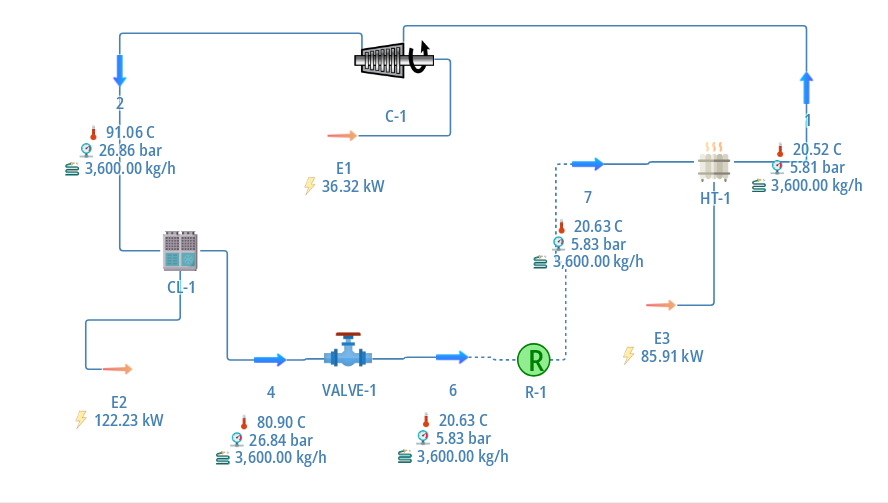

In [1]:
# !pip install tespy

In [2]:
from tespy.networks import Network

# create a network object with R134a as fluid
my_plant = Network()

In [3]:
# set the unitsystem for temperatures to °C and for pressure to bar
my_plant.set_attr(T_unit='C', p_unit='bar', h_unit='kJ / kg') # if specification is not done then by default it will take SI units

In [4]:
from tespy.components import (
    CycleCloser, Compressor, Valve, SimpleHeatExchanger
)

cc = CycleCloser('cycle closer') # Adding the recycle block

# heat sink
co = SimpleHeatExchanger('condenser') # this is condenser
# heat source 
ev = SimpleHeatExchanger('evaporator') # this is evaporator

va = Valve('expansion valve') # this is thermal expansion valve
cp = Compressor('compressor') # this is compressor

In [5]:
from tespy.connections import Connection

# connections of heat pump
c1 = Connection(cc, 'out1', ev, 'in1', label='1')  # Recycle outlet is going in evaporator inlet
c2 = Connection(ev, 'out1', cp, 'in1', label='2') # Evaporator outlet is going in compressor inlet
c3 = Connection(cp, 'out1', co, 'in1', label='3') # Compressor outlet is going in condenser inlet
c4 = Connection(co, 'out1', va, 'in1', label='4') # Condenser outlet is going in valve inlet
c0 = Connection(va, 'out1', cc, 'in1', label='0') # Valve outlet is going in recycle inlet

# this line is crutial: you have to add all connections to your network
my_plant.add_conns(c1, c2, c3, c4, c0)

In [6]:
co.set_attr(pr=0.98) # pressure losses (by outlet to inlet pressure ratio `pr` 
ev.set_attr(pr=0.98)
cp.set_attr(eta_s=0.85) # this is efficiency of compressor

c2.set_attr(T=20, x=1, m=1,fluid={'R134a': 1}) # the state of the fluid at the evaporator’s outlet to fully saturated steam (x=1), evaporation temperature level
c4.set_attr(T=80, x=0) # the condenser’s outlet to fully saturated liquid (x=0).condensation temperature level

In [7]:
my_plant.solve(mode='design')
my_plant.print_results()

print(f'COP = {abs(co.Q.val) / cp.P.val}')
print(f'COP = {abs(ev.Q.val) / cp.P.val}')


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 2.61e+06   | 0 %        | 0.00e+00   | 2.64e+06   | 6.60e+05   | 0.00e+00   | 0.00e+00   
 2     | 9.67e+04   | 11 %       | 0.00e+00   | 1.68e-10   | 1.14e+05   | 0.00e+00   | 0.00e+00   
 3     | 7.28e-12   | 100 %      | 0.00e+00   | 0.00e+00   | 8.56e-12   | 0.00e+00   | 0.00e+00   
 4     | 7.28e-12   | 100 %      | 0.00e+00   | 0.00e+00   | 8.56e-12   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.00 s, Iterations per second: 1189.11

##### RESULTS (SimpleHeatExchanger) #####
+------------+-----------+----------+----------+-----+-----+------+---------+------+--------+
|            |         Q |       pr |     zeta |   D |   L |   ks |   ks_HW |   kA |   Tamb |
|------------+-----------+----------+----------+-----+-----+------+---------+------+--------|
| 

In [8]:
print(f'Mass flow rate = {c2.m.val} kg/s')

# Print heat duties
print(f'Evaporator heat duty (Q_evaporator) = {ev.Q.val} W')
print(f'Condenser heat duty (Q_condenser) = {co.Q.val} W')

Mass flow rate = 1.0 kg/s
Evaporator heat duty (Q_evaporator) = 87358.07390878536 W
Condenser heat duty (Q_condenser) = -124088.18356730131 W


In [9]:
# Solve the system
my_plant.solve(mode='design')

# Print results for all connections
for conn in [c1, c2, c3, c4, c0]:
    print(f"Connection {conn.label}:")
    print(f"  Pressure = {conn.p.val} bar")
    print(f"  Temperature = {conn.T.val} °C")
    print()


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 2.44e-08   | 100 %      | 0.00e+00   | 3.39e-08   | 3.68e-10   | 0.00e+00   | 0.00e+00   
 2     | 4.68e-10   | 100 %      | 0.00e+00   | 4.75e-10   | 5.60e-11   | 0.00e+00   | 0.00e+00   
 3     | 0.00e+00   | 100 %      | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
 4     | 0.00e+00   | 100 %      | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.01 s, Iterations per second: 590.93
Connection 1:
  Pressure = 5.833743969841084 bar
  Temperature = 20.655094890409373 °C

Connection 2:
  Pressure = 5.717069090444261 bar
  Temperature = 19.999999999996646 °C

Connection 3:
  Pressure = 26.869421718785507 bar
  Temperature = 91.1682174800182 °C

Connection 4:
  Pressure = 26.3320332844098 bar
  Temperature = 7

Connection 1:
  Pressure = 5.833743969841084 bar
  Temperature = 20.655094890409373 °C

Connection 2:
  Pressure = 5.717069090444261 bar
  Temperature = 19.999999999996646 °C

Connection 3:
  Pressure = 26.869421718785507 bar
  Temperature = 91.1682174800182 °C

Connection 4:
  Pressure = 26.3320332844098 bar
  Temperature = 79.99999999999994 °C

Connection 0:
  Pressure = 5.833743969841084 bar
  Temperature = 20.655094890409373 °C



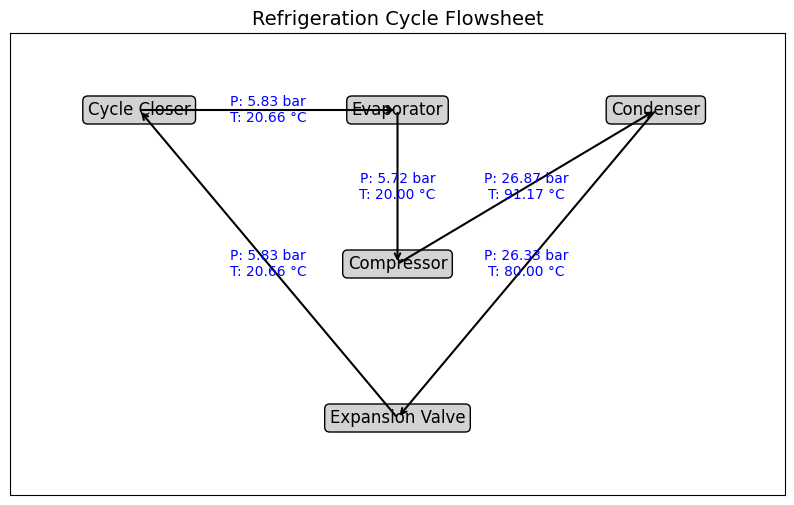

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Print results for all connections and store pressure and temperature values
pressure_values = []
temperature_values = []

for conn in [c1, c2, c3, c4, c0]:
    pressure_values.append(conn.p.val)
    temperature_values.append(conn.T.val)
    print(f"Connection {conn.label}:")
    print(f"  Pressure = {conn.p.val} bar")
    print(f"  Temperature = {conn.T.val} °C")
    print()

# Data for the flow diagram
components = ['Cycle Closer', 'Evaporator', 'Compressor', 'Condenser', 'Expansion Valve']
positions = [(0, 2), (1, 2), (1, 1), (2, 2), (1, 0)]
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]  # Define edges (connections)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot components
for i, (name, (x, y)) in enumerate(zip(components, positions)):
    ax.text(x, y, name, fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgray'))
    ax.plot(x, y, 'o', markersize=10)

# Plot edges with arrows and process variables
for i, (start, end) in enumerate(edges):
    x_values = [positions[start][0], positions[end][0]]
    y_values = [positions[start][1], positions[end][1]]
    
    # Add arrow
    ax.annotate('', xy=(positions[end][0], positions[end][1]),
                xytext=(positions[start][0], positions[start][1]),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5))
    
    # Add process variables text
    mid_x = (positions[start][0] + positions[end][0]) / 2
    mid_y = (positions[start][1] + positions[end][1]) / 2
    ax.text(mid_x, mid_y, f"P: {pressure_values[i]:.2f} bar\nT: {temperature_values[i]:.2f} °C", 
            fontsize=10, ha='center', va='center', color='blue')

# Set axis limits and labels
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Refrigeration Cycle Flowsheet', fontsize=14)

# Show the plot
plt.grid(False)
plt.show()
